In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('Patient.csv')
## filling up NAN values with random values from df
df.apply(lambda x: np.where(x.isnull(), x.dropna().sample(len(x), replace=True), x)).to_csv('PatientData.csv')
df

,Unnamed: 0,PatientID,Age,GenderID,ConnectedToWuhan,Latitude,Longitude,SymptomsStartingDate,HospitalAdmissionDate,InfectionConfirmationDate,...,AdditionalInformation,ChronicDiseasePatient,InformationSource,InfectionOutcomeID,DeathDate,Notes,AgeLowerLimit,AgeUpperLimit,CityID,Temperature
0,0,1,30.0,1.0,1.0,31.646960,117.716600,01/18/2020,01/20/2020,01/22/2020,...,"88 new cases on ""Diamond Princess"" cruise ship...",0.0,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,6.0,02/27/2020,https://new.qq.com/omn/20200215/20200215A0LD41...,20.0,59.0,313.0,37
1,1,2,47.0,1.0,1.0,31.778630,117.331900,01/10/2020,01/21/2020,01/23/2020,...,Patient at Codogno hospital,1.0,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,6.0,02/03/2020,https://www.google.com/maps/place/Xiangcheng+D...,70.0,80.0,313.0,"37,4"
2,2,3,49.0,1.0,1.0,31.828313,117.224844,01/15/2020,01/20/2020,01/23/2020,...,Qingdao Daenam Hospital,1.0,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,6.0,01/23/2020,Daughter of France's 4th case (80 year-old man),80.0,59.0,243.0,37
3,3,4,47.0,2.0,1.0,31.828313,117.224844,01/17/2020,01/20/2020,01/23/2020,...,contacted with confirmed case,1.0,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,6.0,01/28/2020,http://wsjkw.cq.gov.cn/tzgg/20200127/249875.ht...,16.0,79.0,346.0,38
4,4,5,50.0,2.0,1.0,32.001230,117.568100,01/10/2020,01/21/2020,01/23/2020,...,06.01.2020 went to Wuhan| 07.01.2020 returned ...,0.0,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,6.0,02/08/2020,Travel to Cebu and Dumaguete also,50.0,39.0,505.0,"39,3"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13154,13154,13475,40.0,1.0,1.0,28.661490,122.222400,02/27/2020,02/13/2020,02/28/2020,...,Had contact with colleauge (ID 1481) between 2...,1.0,https://www.mhlw.go.jp/content/10906000/000601...,6.0,02/17/2020,Could be some cases from 23rd,60.0,69.0,311.0,38
13155,13155,13476,46.0,2.0,1.0,32.924190,118.160300,02/19/2020,02/14/2020,02/28/2020,...,Requires subtraction of cases reported from 22...,1.0,https://www.mhlw.go.jp/content/10906000/000601...,6.0,02/14/2020,http://wsjkw.cq.gov.cn/tzgg/20200127/249875.html,40.0,49.0,75.0,38
13156,13156,13477,43.0,2.0,1.0,37.623920,139.665100,01/28/2020,02/07/2020,02/28/2020,...,Worked in Shanghai before coming back to Hefei,1.0,https://www.mhlw.go.jp/content/10906000/000601...,6.0,02/06/2020,Asymptomatic but placed in quarantine: https:/...,0.0,10.0,202.0,38
13157,13157,13478,24.0,2.0,1.0,25.779320,139.665100,01/31/2020,02/03/2020,02/28/2020,...,works at Amsterdam UMC Hospital,0.0,https://nos.nl/artikel/2324942-amsterdamse-cor...,6.0,02/05/2020,Could be some cases from 23rd,30.0,80.0,92.0,"38,3"


#### Number of cases per date per country

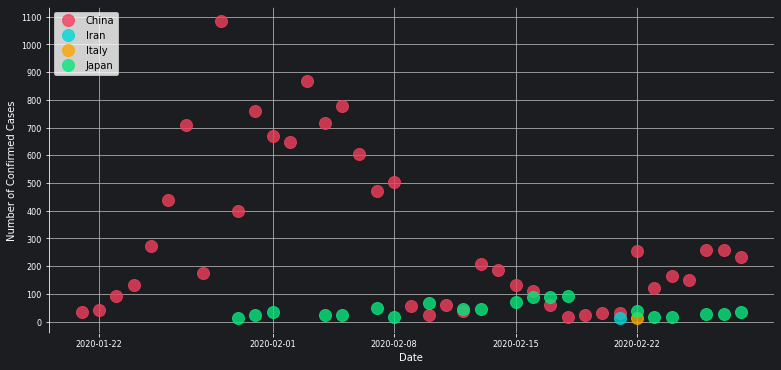

In [4]:
df_CountryData = pd.read_csv('CountryDateCaseNumber.csv')
df_CountryData['Date'] = pd.to_datetime(df_CountryData['Date'])
df_CountryData = df_CountryData.loc[df_CountryData['CasesCount'] > 12]
df_CountryData

fig, ax = plt.subplots(figsize=(13, 6))

ax.margins(0.05)
fig.patch.set_facecolor('#1c1d21')
ax.set_facecolor('#1c1d21')

ax.grid()
ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases')
ax.spines['bottom'].set_color('#1c1d21')
ax.tick_params(axis='x', colors='white')
ax.xaxis.label.set_color('white')

ax.spines['left'].set_color('white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')

ax.spines['top'].set_color('#1c1d21')
ax.spines['right'].set_color('#1c1d21')

ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)

colors = ['#f1405c', '#00d8d5', '#f8a600', '#08e77d', '#17b9f7', '#e26479', '#009688', '#f1405c']
i=0
for name, group in df_CountryData.groupby('CountryName'):
    ax.plot(group.Date, group.CasesCount, marker='o', alpha=0.8, linestyle='', ms=12, label=name, color = colors[i])
    i = i + 1
ax.legend(numpoints=1, loc='upper left')
ax.yaxis.set_ticks(np.arange(0, 1200, 100))

plt.show()


#### Cases per city per date

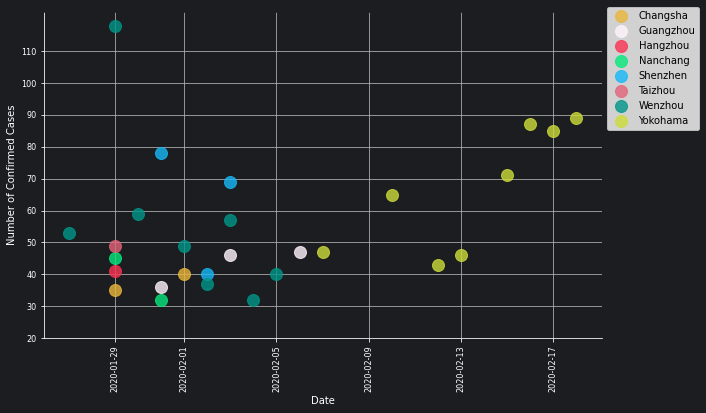

In [5]:
df_CityData = pd.read_csv('CityDateCaseNumber.csv')
df_CityData['Date'] = pd.to_datetime(df_CityData['Date'])
df_CityData = df_CityData.loc[df_CityData['CasesCount'] > 28]

df_CityData

import seaborn as sns
import pandas as pd
import numpy as np
np.random.seed(1974)

z = df_CityData['Date']
x = df_CityData['CasesCount']
y = df_CityData['CityName']

fig, ax = plt.subplots(figsize=(10, 6))

ax.margins(0.05)
fig.patch.set_facecolor('#1c1d21')
ax.set_facecolor('#1c1d21')


ax.grid()
ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases')
ax.spines['bottom'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.xaxis.label.set_color('white')

ax.spines['left'].set_color('white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')

ax.spines['top'].set_color('#1c1d21')
ax.spines['right'].set_color('#1c1d21')

ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)


colors = ['#e9b639', '#fff4fd', '#fc3353', '#06e87c', '#17b9f7', '#e26479', '#009688', '#cddc39']
i=0
for name, group in df_CityData.groupby('CityName'):
    ax.plot(group.Date, group.CasesCount, marker='o', alpha=0.8, linestyle='', ms=12, label=name, color = colors[i])
    i = i + 1
ax.legend(numpoints=1,  bbox_to_anchor=(1.0, 1.03))
plt.xticks(rotation=90)
ax.yaxis.set_ticks(np.arange(20, 120, 10))

plt.show()


#### Number of cases per day

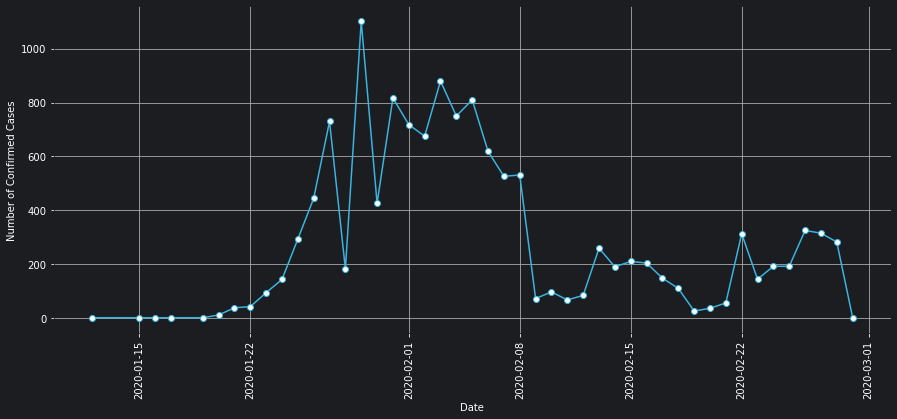

In [63]:
import matplotlib.pyplot as plt

df['InfectionConfirmationDate'] = pd.to_datetime(df['InfectionConfirmationDate'])
df_InfectionConfirmationDates = df[~df.InfectionConfirmationDate.isna()]
df_InfectionConfirmationDates = df_InfectionConfirmationDates[['PatientID','InfectionConfirmationDate']]


fig, ax1 = plt.subplots(figsize=(15, 6))

fig.patch.set_facecolor('#1c1d21')
ax1.set_facecolor('#1c1d21')

dates = [date for date, df_dates in df_InfectionConfirmationDates.groupby('InfectionConfirmationDate')]
plt.plot(dates, df_InfectionConfirmationDates.groupby('InfectionConfirmationDate').count()['PatientID'],color='#3ab5e1', marker='o', markerfacecolor='w')
plt.ticklabel_format(style='plain', axis='y')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Confirmed Cases')
ax1.grid()
ax1.spines['bottom'].set_color('#1c1d21')
ax1.tick_params(axis='x', colors='white')
ax1.xaxis.label.set_color('white')

ax1.spines['left'].set_color('#1c1d21')
ax1.tick_params(axis='y', colors='white')
ax1.yaxis.label.set_color('white')

ax1.spines['top'].set_color('#1c1d21')
ax1.spines['right'].set_color('#1c1d21')

#y_ticks = np.arange(0, 2500000, 1000)
#plt.yticks(y_ticks)
plt.xticks(rotation=90)
#plt.xticks(x)
plt.show()


#### Number of cases per day - detailed

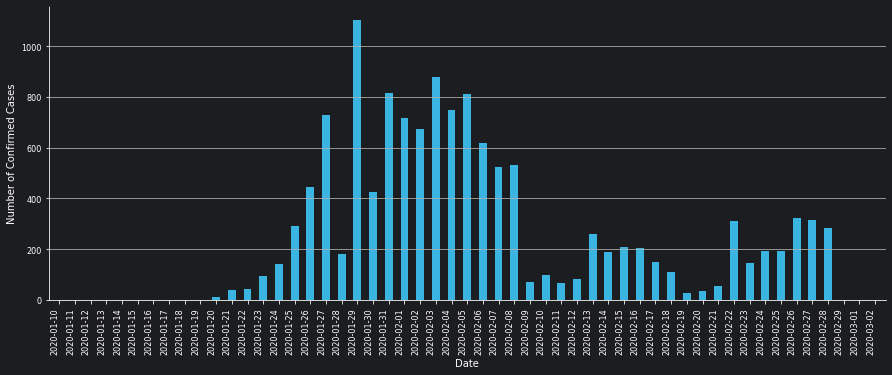

<Figure size 432x288 with 0 Axes>

In [66]:
from matplotlib import dates
import datetime

fig, ax = plt.subplots(figsize=(15, 6))

fig.patch.set_facecolor('#1c1d21')
ax.set_facecolor('#1c1d21')

#ax = fig.add_subplot(1, 1, 1)
darray1 = [date for date, df_dates in df_InfectionConfirmationDates.groupby('InfectionConfirmationDate')]
countarray1 = df_InfectionConfirmationDates.groupby('InfectionConfirmationDate').count()['PatientID']


#converted_dates_1 = list(map(datetime.datetime.strptime, darray1, len(darray1)*['%Y-%m-%d']))
formatter = dates.DateFormatter('%Y-%m-%d')


plt.bar(darray1,countarray1,color="#3ab5e1", width=0.5)
ax.grid(axis='y')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases')
ax.spines['bottom'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.xaxis.label.set_color('white')

ax.spines['left'].set_color('white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')

ax.spines['top'].set_color('#1c1d21')
ax.spines['right'].set_color('#1c1d21')

ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Confirmed Cases')
ax.xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate(rotation=90)
ax.xaxis.set_major_locator(dates.DayLocator(interval=1))

plt.show()
plt.savefig('output.png', dpi=300, bbox_inches='tight')


#### Age distribution - smoothed curve

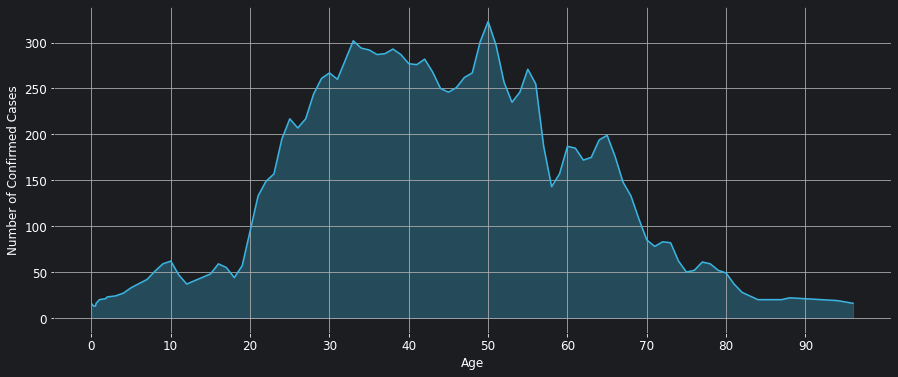

In [80]:
from scipy.ndimage.filters import gaussian_filter1d

fig, ax1 = plt.subplots(figsize=(15, 6))

fig.patch.set_facecolor('#1c1d21')
ax1.set_facecolor('#1c1d21')


darray1 = [age for age, df_ages in df.groupby('Age')]
countarray1 = df.groupby('Age').count()['PatientID']

age_smoothed = gaussian_filter1d(countarray1, sigma=1)

plt.plot(darray1,age_smoothed, color='#3ab5e1')
ax1.fill_between(darray1, 0, age_smoothed, color='#3ab5e1', alpha=0.3)

plt.ticklabel_format(style='plain', axis='y')
ax1.set_xlabel('Age' ,fontsize=12)
ax1.set_ylabel('Number of Confirmed Cases', fontsize=12)

ax1.spines['bottom'].set_color('#1c1d21')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.xaxis.label.set_color('white')

ax1.grid()

ax1.spines['left'].set_color('#1c1d21')
ax1.tick_params(axis='y', colors='white')
ax1.yaxis.label.set_color('white')

ax1.spines['top'].set_color('#1c1d21')
ax1.spines['right'].set_color('#1c1d21')
ax1.grid()

start, end = ax.get_xlim()
ax1.xaxis.set_ticks(np.arange(0, 100, 10))

start, end = ax.get_ylim()
ax1.yaxis.set_ticks(np.arange(0, 340, 50))
ax1.grid()
plt.show()


#### Most common symptoms

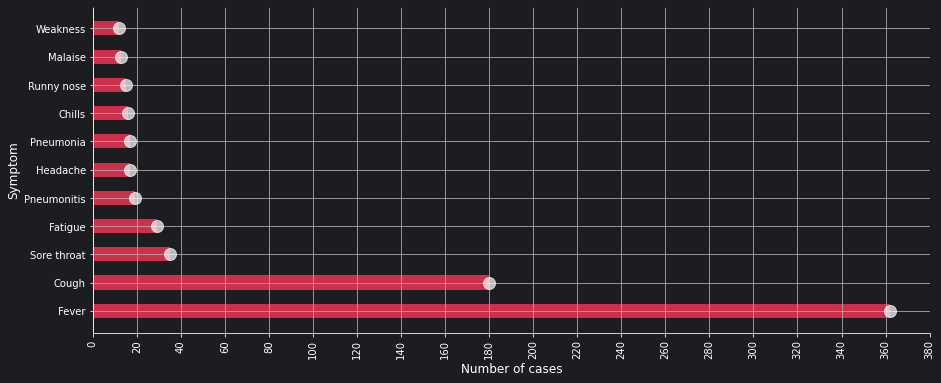

In [49]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker

df_Symptom = pd.read_csv('Symptom.csv')
df_PatientSymptom = pd.read_csv('PatientSymptom.csv')
df_PatientSymptom = pd.merge(df_PatientSymptom, df_Symptom, on = 'SymptomID')
df_PatientSymptom['SymptomID'].value_counts()

df_PatientSymptom
fig5, ax5 = plt.subplots(figsize=(15, 6))

fig5.patch.set_facecolor('#1c1d21')
ax5.set_facecolor('#1c1d21')

ax5.spines['bottom'].set_color('white')
ax5.tick_params(axis='x', colors='white')
ax5.xaxis.label.set_color('white')

ax5.spines['left'].set_color('white')
ax5.tick_params(axis='y', colors='white')
ax5.yaxis.label.set_color('white')

ax5.spines['top'].set_color('#1c1d21')
ax5.spines['right'].set_color('#1c1d21')

ax5.set_ylabel('Symptom', fontsize=12)
ax5.set_xlabel('Number of cases', fontsize=12)

ax5.tick_params(axis="x", labelsize=10)
ax5.tick_params(axis="y", labelsize=10)

ax5.grid()
plt.xticks(rotation=90)
darray5 = [name for name, df in df_PatientSymptom.groupby('Name')]
countarray5 = df_PatientSymptom.groupby('Name').count()['ID']

df_OrderedSymptoms = df_PatientSymptom.groupby('Name').count().add_suffix('_Count').reset_index()
df_OrderedSymptoms.sort_values(by=['PatientID_Count'], ascending=False)['PatientID_Count']
df_OrderedSymptoms = df_OrderedSymptoms.loc[df_OrderedSymptoms['PatientID_Count'] > 10]

darray6 = df_OrderedSymptoms.sort_values(by=['PatientID_Count'], ascending=False)['Name']
countarray6 = df_OrderedSymptoms.sort_values(by=['PatientID_Count'], ascending=False)['PatientID_Count']

ax5.xaxis.set_ticks(np.arange(0, 400, 20))

plt.barh(darray6,countarray6 , color='#fc3657' , alpha=0.8, height=0.5)
plt.plot(countarray6, darray6, marker='o', markerfacecolor='white', alpha=0.7, linestyle="", color="w", markersize=12)


#### Least commonsymptoms

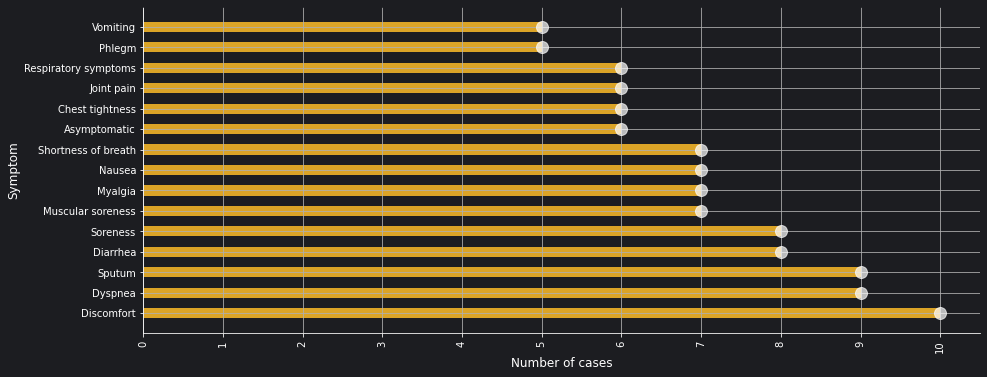

In [54]:
fig5, ax5 = plt.subplots(figsize=(15, 6))

fig5.patch.set_facecolor('#1c1d21')
ax5.set_facecolor('#1c1d21')

ax5.spines['bottom'].set_color('white')
ax5.tick_params(axis='x', colors='white')
ax5.xaxis.label.set_color('white')

ax5.spines['left'].set_color('white')
ax5.tick_params(axis='y', colors='white')
ax5.yaxis.label.set_color('white')

ax5.spines['top'].set_color('#1c1d21')
ax5.spines['right'].set_color('#1c1d21')

ax5.set_ylabel('Symptom', fontsize=12)
ax5.set_xlabel('Number of cases', fontsize=12)

ax5.tick_params(axis="x", labelsize=10)
ax5.tick_params(axis="y", labelsize=10)

ax5.grid()
plt.xticks(rotation=90)
darray5 = [name for name, df in df_PatientSymptom.groupby('Name')]
countarray5 = df_PatientSymptom.groupby('Name').count()['ID']

#plt.bar(darray5,countarray5,color="#3ab5e1", log=True)

#df_PatientSymptom['Name'].value_counts()
#df_PatientSymptom.groupby('SymptomID').count()['ID']


df_OrderedSymptoms = df_PatientSymptom.groupby('Name').count().add_suffix('_Count').reset_index()
df_OrderedSymptoms.sort_values(by=['PatientID_Count'], ascending=False)['PatientID_Count']
df_OrderedSymptoms = df_OrderedSymptoms.loc[(df_OrderedSymptoms['PatientID_Count'] > 4) & (df_OrderedSymptoms['PatientID_Count'] < 11)]


from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker

darray6 = df_OrderedSymptoms.sort_values(by=['PatientID_Count'], ascending=False)['Name']
countarray6 = df_OrderedSymptoms.sort_values(by=['PatientID_Count'], ascending=False)['PatientID_Count']

ax5.xaxis.set_ticks(np.arange(0, 15, 1))

plt.barh(darray6,countarray6 , color='#f1b428' , alpha=0.9, height=0.5)
plt.plot(countarray6, darray6, marker='o', markerfacecolor='white', alpha=0.7, linestyle="", color="w", markersize=12)


#### Gender ratio

<BarContainer object of 2 artists>

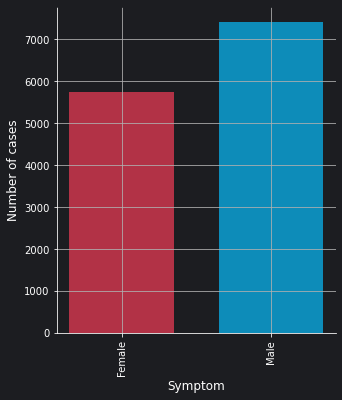

In [43]:
df_Gender = pd.read_csv('Gender.csv')
df_Gender = pd.merge(df, df_Gender, on='GenderID')
df_Gender = df_Gender[['PatientID', 'GenderName', 'Age']]

fig7, ax7 = plt.subplots(figsize=(5, 6))

fig7.patch.set_facecolor('#1c1d21')
ax7.set_facecolor('#1c1d21')

ax7.spines['bottom'].set_color('white')
ax7.tick_params(axis='x', colors='white')
ax7.xaxis.label.set_color('white')

ax7.spines['left'].set_color('white')
ax7.tick_params(axis='y', colors='white')
ax7.yaxis.label.set_color('white')

ax7.spines['top'].set_color('#1c1d21')
ax7.spines['right'].set_color('#1c1d21')

ax7.set_ylabel('Number of cases', fontsize=12)
ax7.set_xlabel('Symptom', fontsize=12)

ax7.tick_params(axis="x", labelsize=10)
ax7.tick_params(axis="y", labelsize=10)

ax7.grid()
plt.xticks(rotation=90)
darray7 = [name for name, df in df_Gender.groupby('GenderName')]
countarray7 = df_Gender.groupby('GenderName').count()['PatientID']

def_colors = ['#f33b57', '#08bcfb']
plt.bar(darray7,countarray7 , color= def_colors , alpha=0.7, width=0.7)


#### Most travelled locations

<BarContainer object of 7 artists>

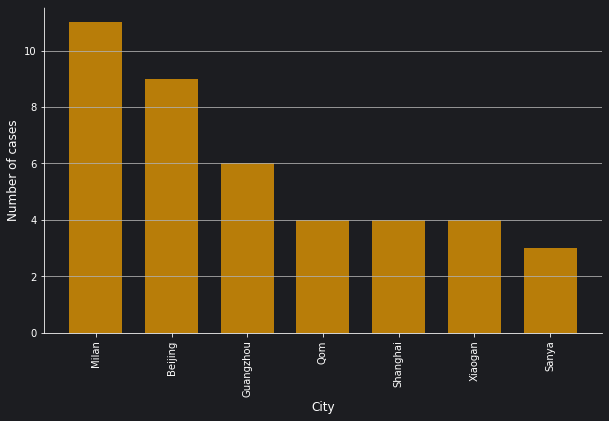

In [56]:
import numpy as np

df_TraveledPlaces = pd.read_csv('PatientTravelLocation.csv')
df_City = pd.read_csv('City.csv')
df_TraveledPlaces = pd.merge(df_TraveledPlaces, df_City, on = 'CityID')

df_TraveledPlaces = df_TraveledPlaces.loc[df_TraveledPlaces['CityName'] != 'Wuhan']

fig8, ax8 = plt.subplots(figsize=(10, 6))

fig8.patch.set_facecolor('#1c1d21')
ax8.set_facecolor('#1c1d21')

ax8.spines['bottom'].set_color('white')
ax8.tick_params(axis='x', colors='white')
ax8.xaxis.label.set_color('white')

ax8.spines['left'].set_color('white')
ax8.tick_params(axis='y', colors='white')
ax8.yaxis.label.set_color('white')

ax8.spines['top'].set_color('#1c1d21')
ax8.spines['right'].set_color('#1c1d21')

ax8.set_ylabel('Number of cases', fontsize=12)
ax8.set_xlabel('City', fontsize=12)

ax8.tick_params(axis="x", labelsize=10)
ax8.tick_params(axis="y", labelsize=10)

ax8.grid(axis='y')
plt.xticks(rotation=90)

df_OrderedPlaces = df_TraveledPlaces.groupby('CityName').count().add_suffix('_Count').reset_index()
df_OrderedPlaces = df_OrderedPlaces[['CityName', 'ID_Count']]
                                                         
df_OrderedPlaces = df_OrderedPlaces.loc[(df_OrderedPlaces['ID_Count'] > 2) ]
df_OrderedPlaces = df_OrderedPlaces.sort_values(by=['ID_Count'], ascending=False)
df_OrderedPlaces

darray8 = df_OrderedPlaces.sort_values(by=['ID_Count'], ascending=False)['CityName']
countarray8 = df_OrderedPlaces.sort_values(by=['ID_Count'], ascending=False)['ID_Count']

plt.bar(darray8,countarray8 , color='#fca700' ,alpha=0.7,width=0.7)




#### Cases connected to Wuhan

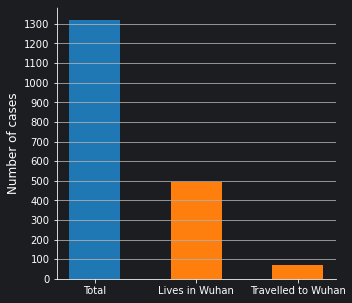

In [138]:
df_City = pd.read_csv('City.csv')
df_City = df_City.loc[df_City['CountryID'] != 28]
df_NotFromChina = pd.merge(df, df_City, on = 'CityID')
#df_NotFromChina

df_TravelLocation = pd.read_csv('PatientTravelLocation.csv')
df_WuhanTravelLocation = df_TravelLocation.loc[df_TravelLocation['CityID'] == 785]
df_PatientsTravelledToWuhan = pd.merge(df_NotFromChina, df_WuhanTravelLocation, on = 'PatientID')
#df_PatientsTravelledToWuhan 

# Lives in Wuhan, addmission in another country
df_LivesInWuhan = df_NotFromChina.loc[df_NotFromChina['LivesInWuhan'] == 1]
#df_LivesInWuhan


WuhanDataSet = {
    'Lives in Wuhan' : len(df_NotFromChina.loc[df_NotFromChina['LivesInWuhan'] == 1]),
    'Travelled to Wuhan' : len(df_PatientsTravelledToWuhan[df_PatientsTravelledToWuhan['CityID_y'] == 785])
}

WuhanDataSet
#df_PatientsTravelledToWuhan 
import matplotlib.pylab as plt

fig=plt.figure(figsize=(5,5));
ax=fig.add_subplot(111);


fig.patch.set_facecolor('#1c1d21')
ax.set_facecolor('#1c1d21')

ax.spines['bottom'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.xaxis.label.set_color('white')

ax.spines['left'].set_color('white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')

ax.spines['top'].set_color('#1c1d21')
ax.spines['right'].set_color('#1c1d21')

ax.set_ylabel('Number of cases', fontsize=12)


ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

ax.yaxis.set_ticks(np.arange(0, 1500, 100))
ax.grid(axis='y')

ax.bar('Total',len(df_NotFromChina[df_NotFromChina['ConnectedToWuhan'] == 1]), width=0.5)
ax.bar(list(WuhanDataSet.keys()),list(WuhanDataSet.values()), width=0.5)
plt.show();

#WuhanDataSet




#### Number of cases per month according to symptoms starting date

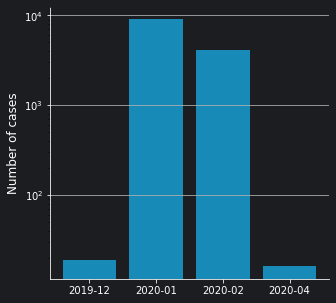

In [159]:
df['SymptomsStartingDate'] = pd.to_datetime(df['SymptomsStartingDate'])
df_SymptomsStartingDates = df[~df.SymptomsStartingDate.isna()]
df_SymptomsStartingDates = df_SymptomsStartingDates[['PatientID','SymptomsStartingDate']]
#df['InfectionConfirmationMonthAndYear'] = pd.concat(months['InfectionConfirmationDate'].dt.year, months['InfectionConfirmationDate'].dt.month)
df_SymptomsStartingDates = df_SymptomsStartingDates.reset_index()
df_SymptomsStartingDates['SymptomsStartingYearAndMonth'] = df_SymptomsStartingDates['SymptomsStartingDate'].apply(lambda x: x.strftime('%Y-%m'))
#months.set_index('InfectionConfirmationDate', inplace=True)
#df_InfectionConfirmationDates
#df_SymptomsStartingDates.groupby('SymptomsStartingYearAndMonth').count()['ID']

fig=plt.figure(figsize=(5,5));
ax=fig.add_subplot(111);


fig.patch.set_facecolor('#1c1d21')
ax.set_facecolor('#1c1d21')

ax.spines['bottom'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.xaxis.label.set_color('white')

ax.spines['left'].set_color('white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')

ax.spines['top'].set_color('#1c1d21')
ax.spines['right'].set_color('#1c1d21')

ax.set_ylabel('Number of cases', fontsize=12)


ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

ax.yaxis.set_ticks(np.arange(0, 1500, 100))
ax.grid(axis='y')

dates = [date for date, df_dates in df_SymptomsStartingDates.groupby('SymptomsStartingYearAndMonth')]
plt.bar(dates, df_SymptomsStartingDates.groupby('SymptomsStartingYearAndMonth').count()['PatientID'], log=True, alpha=0.7, color='#17b9f9')
#plt.ticklabel_format(style='plain', axis='y')
#y_ticks = np.arange(0, 9000, 300)
#plt.yticks(y_ticks)
plt.show()


#### Number of patients who were discharged relative to the age of patient

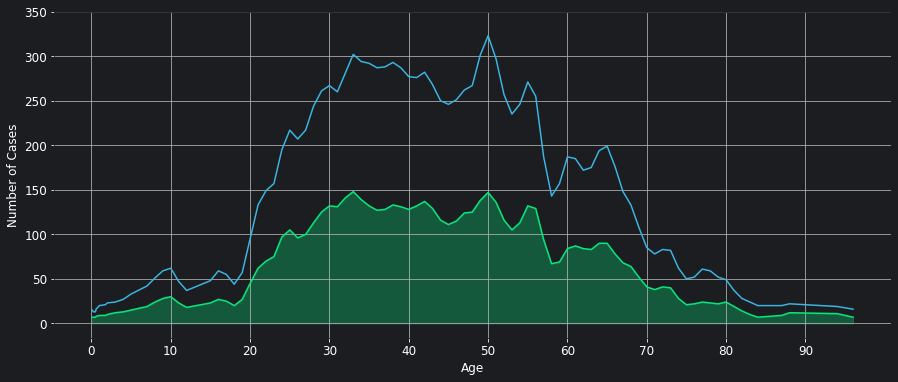

In [40]:
from scipy.ndimage.filters import gaussian_filter1d

fig, ax1 = plt.subplots(figsize=(15, 6))

fig.patch.set_facecolor('#1c1d21')
ax1.set_facecolor('#1c1d21')


darray1 = [age for age, df_ages in df.groupby('Age')]
countarray1 = df.groupby('Age').count()['PatientID']
countarray2 = df.loc[df['InfectionOutcomeID'] == 6].groupby('Age').count()['PatientID']

age_smoothed = gaussian_filter1d(countarray1, sigma=1)
outcome_smoothed = gaussian_filter1d(countarray2, sigma=1)

plt.plot(darray1,age_smoothed, color='#3ab5e1')
plt.plot(darray1,outcome_smoothed, color='#08e77d')
ax1.fill_between(darray1, 0, outcome_smoothed, color='#08e77d', alpha=0.3)
plt.ticklabel_format(style='plain', axis='y')
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Number of Cases', fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.grid()
ax1.spines['bottom'].set_color('#1c1d21')
ax1.tick_params(axis='x', colors='white')
ax1.xaxis.label.set_color('white')

ax1.spines['left'].set_color('#1c1d21')
ax1.tick_params(axis='y', colors='white')
ax1.yaxis.label.set_color('white')

ax1.spines['top'].set_color('#1c1d21')
ax1.spines['right'].set_color('#1c1d21')
ax1.grid()

start, end = ax.get_xlim()
ax1.xaxis.set_ticks(np.arange(0, 100, 10))

ax1.grid()

start, end = ax.get_ylim()
ax1.yaxis.set_ticks(np.arange(0, 400, 50))

plt.show()
